In [1]:
#Import tools
%matplotlib inline
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Reading cleaned dataset
data = pd.read_csv("output/data.csv")

In [3]:
#Removing unwanted data from specific columns and creating new datframes
founded_df = data.loc[(data['Founded']!=0)]
rating_df = data.loc[(data['Rating']!=0)]
sector_df = data.loc[(data['Sector']!='0')]
size_df = data.loc[(data['Size']!= '0')]
industry_df = data.loc[(data['Industry']!='0')]
ownership_df = data.loc[(data['Type of ownership']!='0')]
competitors_df = data.loc[(data['Competitors']!='0')]
revenue_df = data.dropna()

In [4]:
# engineer_df = data.loc[data['Job Title'] == 'Data Engineer']
# scientist_df = data.loc[data['Job Title'] == 'Data Scientist']
# analyst_df = data.loc[data['Job Title'] == 'Data Analyst']


In [5]:
data

,Job Title,Company Name,Rating,Salary Estimate Average,Salary Estimate Min,Salary Estimate Max,Location,State,Size,Founded,Type of ownership,Industry,Sector,Revenue (millions),Easy Apply,Competitors
0,Data Engineer,Sagence,4.5,115000.0,80000,150000.0,"New York, NY",NY,VSB (<50 Employees),2009,Company - Private,Consulting,Business Services,2.5,0,"WCI Consulting, PwC"
1,Data Engineer,Enterprise Integration,3.4,115000.0,80000,150000.0,"New York, NY",NY,SMB(51-500 Employees),1998,Company - Private,IT Services,Information Technology,5.0,0,0
2,Data Engineer,Maestro Technologies,5.0,115000.0,80000,150000.0,"New York, NY",NY,SMB(51-500 Employees),2003,Company - Private,IT Services,Information Technology,1.0,0,0
3,Data Engineer,Jane Street,4.8,115000.0,80000,150000.0,"New York, NY",NY,"Mid-Market(501-5,000 Employees)",2000,Company - Private,Investment Banking & Asset Management,Finance,0.0,0,0
4,Data Engineer,GNY Insurance Companies,3.7,115000.0,80000,150000.0,"New York, NY",NY,VSB (<50 Employees),1914,Company - Private,Insurance Carriers,Insurance,50.0,True,"Travelers, Chubb, Crum & Forster"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,Data Scientist,Nationwide Children's Hospital,3.7,83500.0,55000,112000.0,"Columbus, OH",OH,"Enterprise(5,000+ Employees)",1892,Nonprofit Organization,Health Care Services & Hospitals,Health Care,200.0,0,0
6592,Data Scientist,UCB,3.7,83500.0,55000,112000.0,"Slough, OH",OH,"Enterprise(5,000+ Employees)",0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500.0,0,AbbVie
6593,Data Scientist,UCB,3.7,83500.0,55000,112000.0,"Slough, OH",OH,"Enterprise(5,000+ Employees)",0,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,500.0,0,AbbVie
6594,Data Scientist,Varsity Tutors,4.2,83500.0,55000,112000.0,"Columbus, OH",OH,VSB (<50 Employees),2007,Company - Private,Internet,Information Technology,0.0,0,0


In [6]:
#Grouping by Job title and selecting needed numerical values for the columns
title_df = data.groupby(["Job Title"]).mean()

#Add a count column for analysis
title_df['Count'] = data.groupby(["Job Title"]).agg({'Job Title': ['count']})

title_df = title_df[['Count', 'Rating', 'Salary Estimate Average']]
title_df = title_df.sort_values(by='Salary Estimate Average', ascending=True).head(15)
title_df

,Count,Rating,Salary Estimate Average
Job Title,,,
Data Analyst,2227,3.283026,72133.647799
Data Engineer,2476,3.467124,100908.521809
Data Scientist,1893,3.378024,115027.469625


In [7]:
#Grouping by size and reindexing
data = data.drop(data.index[[0]])
data['Size']=data['Size'].replace(to_replace='0',value='Unknown')
market_df = data.groupby(["Size",'Job Title']).count()[['Company Name']]
market_df
market_df['Size'] = market_df.index
market_df

Company Name  \
Size                            Job Title                      
Enterprise(5,000+ Employees)    Data Analyst             461   
                                Data Engineer            666   
                                Data Scientist           727   
Mid-Market(501-5,000 Employees) Data Analyst             208   
                                Data Engineer            242   
                                Data Scientist           130   
SMB(51-500 Employees)           Data Analyst             419   
                                Data Engineer            382   
                                Data Scientist           226   
Unknown                         Data Analyst             201   
                                Data Engineer            180   
                                Data Scientist           147   
VSB (<50 Employees)             Data Analyst             937   
                                Data Engineer           1005   
                                Data Scientist           663   

                                                                                             Size  
Size                            Job Title                                                          
Enterprise(5,000+ Employees)    Data Analyst         (Enterprise(5,000+ Employees), Data Analyst)  
                                Data Engineer       (Enterprise(5,000+ Employees), Data Engineer)  
                                Data Scientist     (Enterprise(5,000+ Employees), Data Scientist)  
Mid-Market(501-5,000 Employees) Data Analyst      (Mid-Market(501-5,000 Employees), Data Analyst)  
                                Data Engineer    (Mid-Market(501-5,000 Employees), Data Engineer)  
                                Data Scientist  (Mid-Market(501-5,000 Employees), Data Scientist)  
SMB(51-500 Employees)           Data Analyst                (SMB(51-500 Employees), Data Analyst)  
                                Data Engineer              (SMB(51-500 Employees), Data Engineer)  
                                Data Scientist            (SMB(51-500 Employees), Data Scientist)  
Unknown                         Data Analyst                              (Unknown, Data Analyst)  
                                Data Engineer                            (Unknown, Data Engineer)  
                                Data Scientist                          (Unknown, Data Scientist)  
VSB (<50 Employees)             Data Analyst                  (VSB (<50 Employees), Data Analyst)  
                                Data Engineer                (VSB (<50 Employees), Data Engineer)  
                                Data Scientist              (VSB (<50 Employees), Data Scientist)

In [8]:
#Use dual indexed data to create summary table
company_size_df = size_df.groupby(["Size"]).mean()

company_size_df['Count'] = size_df.groupby(["Size"]).agg({'Size': ['count']})
company_size_df = company_size_df.drop(company_size_df.index[[3]])
company_size_df
company_size_df = company_size_df[[]]

analyst_count = [937,461,208, 419]
company_size_df['Analyst Count']= analyst_count

scientist_count = [663,724,130, 226]
company_size_df['Scientist Count']= scientist_count

engineer_count = [1002,461,240, 378]
company_size_df['Engineer Count']= engineer_count

company_size_df = company_size_df.sort_values(by='Analyst Count', ascending=False)
company_size_df = company_size_df[['Engineer Count','Analyst Count','Scientist Count']]
company_size_df

,Engineer Count,Analyst Count,Scientist Count
Size,,,
"Enterprise(5,000+ Employees)",1002,937,663
"Mid-Market(501-5,000 Employees)",461,461,724
VSB (<50 Employees),378,419,226
SMB(51-500 Employees),240,208,130


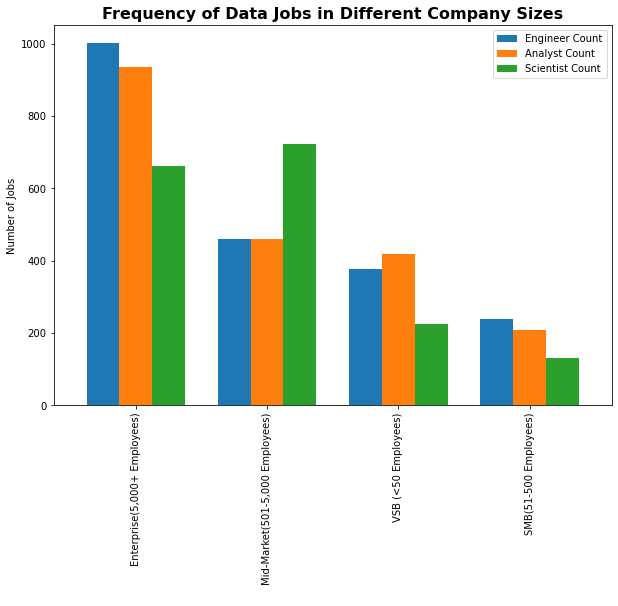

<Figure size 432x288 with 0 Axes>

In [9]:
#Charting frequency of jobs by market segment
company_size_df.plot(kind="bar", figsize=(10,7), width=.75)

#set chart title
plt.title("Frequency of Data Jobs in Different Company Sizes", fontsize=16, fontweight="bold")
plt.xlabel(" ")
plt.ylabel("Number of Jobs")

#Show chart and set layout
plt.show()
plt.tight_layout()


In [10]:
#Grouping by Type of ownership 
ownership_df = ownership_df.groupby(["Type of ownership",'Job Title']).count()[['Company Name']]
ownership_df

Company Name
Type of ownership              Job Title                   
College / University           Data Analyst              33
                               Data Engineer             13
                               Data Scientist            60
Company - Private              Data Analyst            1264
                               Data Engineer           1367
                               Data Scientist           735
Company - Public               Data Analyst             439
                               Data Engineer            732
                               Data Scientist           688
Contract                       Data Analyst              11
                               Data Engineer             10
                               Data Scientist             8
Franchise                      Data Analyst               2
Government                     Data Analyst              37
                               Data Engineer             21
                               Data Scientist            55
Hospital                       Data Analyst              18
                               Data Engineer              3
                               Data Scientist            10
Nonprofit Organization         Data Analyst             124
                               Data Engineer             48
                               Data Scientist           128
Other Organization             Data Analyst              13
                               Data Engineer              4
                               Data Scientist             1
Private Practice / Firm        Data Analyst               9
                               Data Engineer              6
                               Data Scientist             3
School / School District       Data Analyst               9
                               Data Engineer              1
Self-employed                  Data Analyst               2
                               Data Engineer              1
                               Data Scientist             1
Subsidiary or Business Segment Data Analyst              89
                               Data Engineer            123
                               Data Scientist            76
Unknown                        Data Analyst              16
                               Data Engineer             29
                               Data Scientist            17

In [11]:
#Use dual indexed data to select top five types of ownership to create summary table
ownership_df = data.groupby(["Type of ownership"]).mean()
ownership_df = ownership_df [[]]

ownership_df = ownership_df.drop(ownership_df.index[[0,4,5,6,7,9,10,11,12,14]])
analyst_count1 = [33 , 1264 , 439, 124, 89]

ownership_df['Analyst Count']= analyst_count1

scientist_count1 = [60,735,685,128,76]
ownership_df['Scientist Count']= scientist_count1

engineer_count1 = [13,1367,732,48,123]
ownership_df['Engineer Count']= engineer_count1

ownership_df = ownership_df[['Engineer Count','Analyst Count','Scientist Count']]
ownership_df

,Engineer Count,Analyst Count,Scientist Count
Type of ownership,,,
College / University,13,33,60
Company - Private,1367,1264,735
Company - Public,732,439,685
Nonprofit Organization,48,124,128
Subsidiary or Business Segment,123,89,76


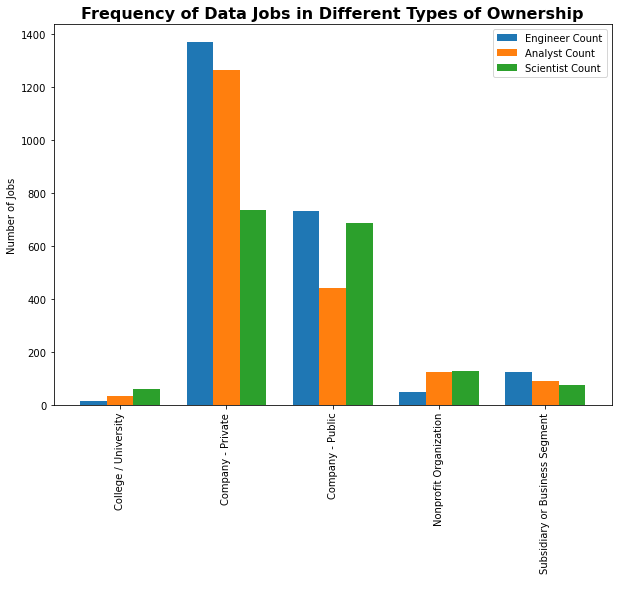

<Figure size 432x288 with 0 Axes>

In [12]:
#Charting frequency of jobs by Types fo Ownership
ownership_df.plot(kind="bar", figsize=(10,7), width=.75)

#set chart title
plt.title("Frequency of Data Jobs in Different Types of Ownership", fontsize=16, fontweight="bold")
plt.xlabel(" ")
plt.ylabel("Number of Jobs")

#Show chart and set layout
plt.show()
plt.tight_layout()

In [13]:
#Grouped by Company Names
Company_Name_df = data.groupby(["Company Name"]).mean()

Company_Name_df['Count'] = data.groupby(["Company Name"]).agg({'Job Title': ['count']})
Company_Name_df = Company_Name_df[['Count']]
Company_Name_df = Company_Name_df.sort_values(by='Count', ascending=False).head(10)
#Show top 5 companies
Company_Name_df

,Count
Company Name,
Amazon,63
Apple,61
"Staffigo Technical Services, LLC",58
IBM,46
Diverse Lynx,40
Humana,33
Facebook,31
Kforce,28
Southwest Research Institute,27


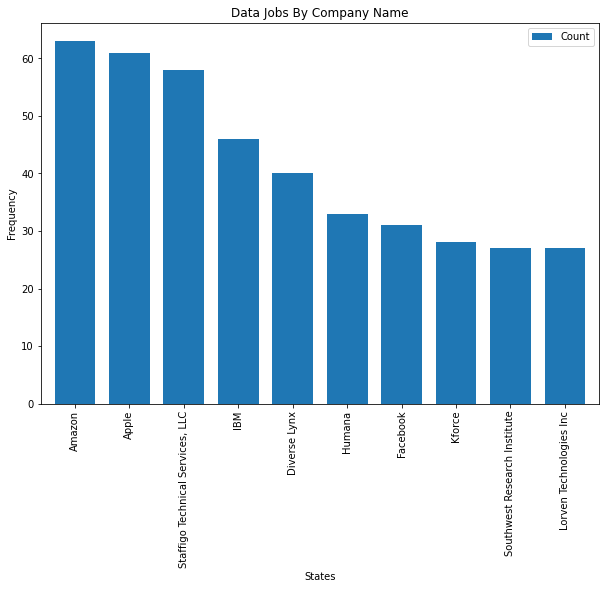

<Figure size 432x288 with 0 Axes>

In [14]:
#Charting frequency of jobs by Company name
Company_Name_df.plot(kind="bar", figsize=(10,7), width=.75)

#set chart title
plt.title("Data Jobs By Company Name")
plt.xlabel("States")
plt.ylabel("Frequency")

#Show chart and set layout
plt.show()
plt.tight_layout()


In [15]:
#Grouped by state
state_df = data.groupby(["State"]).mean()

state_df['Count'] = data.groupby(["State"]).agg({'Job Title': ['count']})

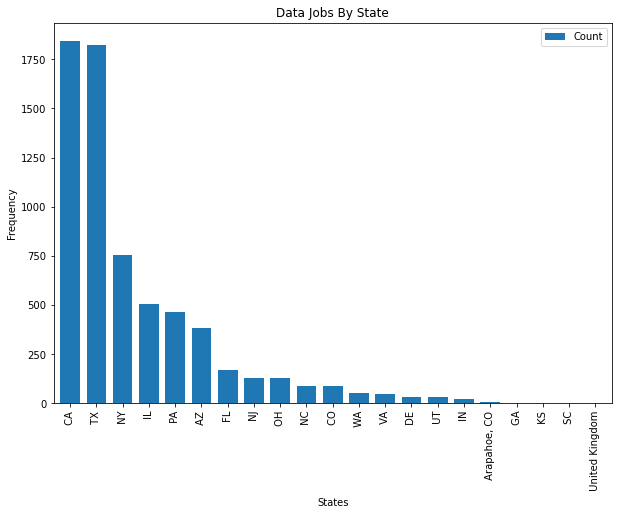

<Figure size 432x288 with 0 Axes>

In [16]:
#Charting frequency of jobs by state
state_df_count = state_df[['Count']]
state_df_count = state_df_count.sort_values(by='Count', ascending=False)
state_df_count.plot(kind="bar", figsize=(10,7), width=.75)

#set chart title
plt.title("Data Jobs By State")
plt.xlabel("States")
plt.ylabel("Frequency")

#Show chart and set layout
plt.show()
plt.tight_layout()


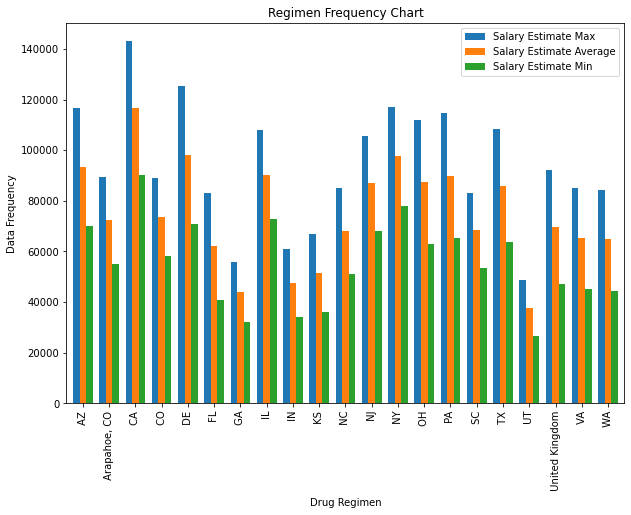

<Figure size 432x288 with 0 Axes>

In [17]:
#Charted again but with min max and average salary
state_df1 = state_df[['Salary Estimate Max','Salary Estimate Average', 'Salary Estimate Min']]
state_df1.plot(kind="bar", figsize=(10,7), width=.75)

#set chart title
plt.title("Regimen Frequency Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Frequency")

#Show chart and set layout
plt.show()
plt.tight_layout()


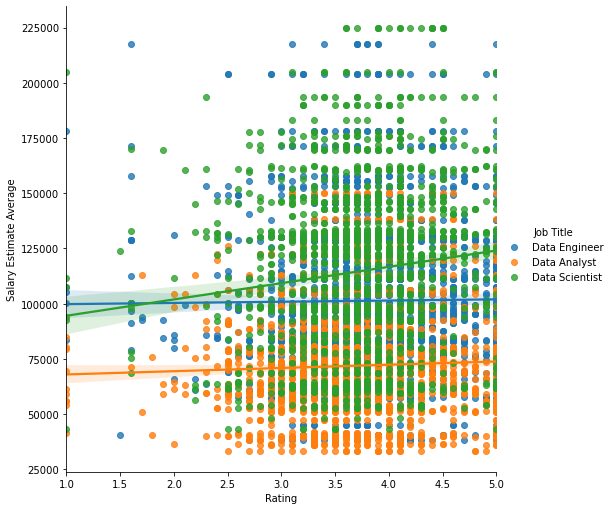

In [18]:
#Used Seaborn to create scatterplot to show correlation between rating and salary average
sns.lmplot(data=rating_df, x='Rating', y='Salary Estimate Average', hue='Job Title', height=7)


In [19]:
#Getting a count of jobs by Industry
industry_df1 = industry_df.groupby(["Industry"]).mean()
industry_df1['Count'] = industry_df.groupby(["Industry"]).agg({'Industry': ['count']})
industry_df1
industry_df1 = industry_df1[['Count', 'Rating', 'Salary Estimate Average']]
industry_df1 = industry_df1.sort_values(by='Count', ascending=False).head(10)
industry_df1
                                      

,Count,Rating,Salary Estimate Average
Industry,,,
IT Services,818,3.849022,90571.515892
Staffing & Outsourcing,604,3.772848,86325.870647
Computer Hardware & Software,480,3.877500,108784.375000
Internet,357,3.948179,116778.711485
Biotech & Pharmaceuticals,330,3.551818,107187.878788
Health Care Services & Hospitals,311,3.590032,88844.051447
Enterprise Software & Network Solutions,271,3.865683,99348.708487
Consulting,264,3.702652,88229.166667
Investment Banking & Asset Management,191,3.734555,85455.497382


In [20]:
#Reindexing
title_df['Job Title'] = ['Data Analyst', 'Data Engineer','Data Scientist']

In [21]:
title_df

,Count,Rating,Salary Estimate Average,Job Title
Job Title,,,,
Data Analyst,2227,3.283026,72133.647799,Data Analyst
Data Engineer,2476,3.467124,100908.521809,Data Engineer
Data Scientist,1893,3.378024,115027.469625,Data Scientist


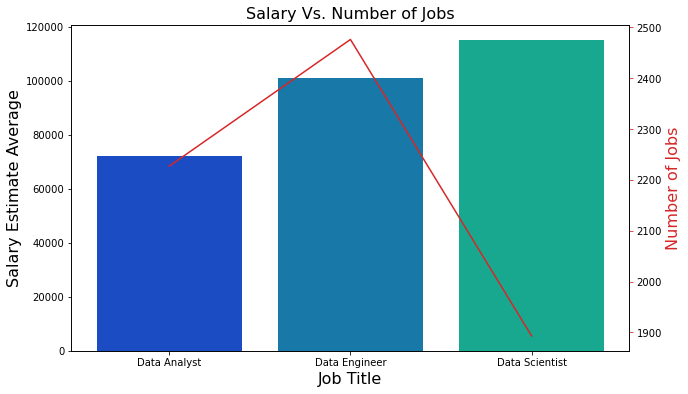

In [22]:
#Creating a dual axis chart with Salary and number of jobs
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.set_title('Salary Vs. Number of Jobs', fontsize=16)
ax1.set_xlabel('Job Title', fontsize=16)
ax1.set_ylabel('Salary Estimate Average' , fontsize=16)
ax2 = sns.barplot(x='Job Title', y='Salary Estimate Average', data = title_df, palette='winter')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Jobs', fontsize=16, color=color)
ax2 = sns.lineplot(x='Job Title', y='Count', data = title_df, sort=False, color=color)
ax2.tick_params(axis='y',color=color)
plt.show()

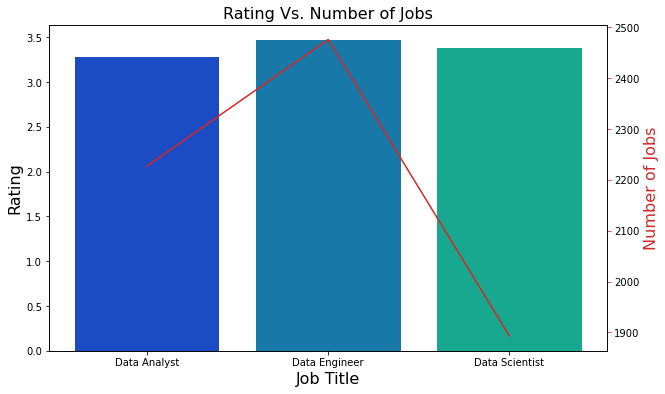

In [23]:
#Creating a dual axis chart with Rating and number of jobs
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.set_title('Rating Vs. Number of Jobs', fontsize=16)
ax1.set_xlabel('Job Title', fontsize=16)
ax1.set_ylabel('Rating' , fontsize=16)
ax2 = sns.barplot(x='Job Title', y='Rating', data = title_df, palette='winter')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Jobs', fontsize=16, color=color)
ax2 = sns.lineplot(x='Job Title', y='Count', data = title_df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [24]:
data['Job Title'].value_counts()

Data Engineer     2475
Data Analyst      2227
Data Scientist    1893
Name: Job Title, dtype: int64

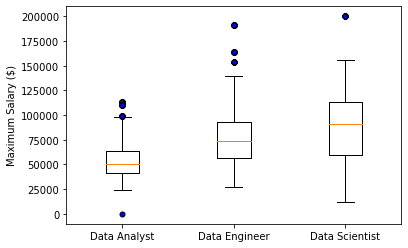

In [31]:
# Create box plots for Max Salary and find outliers for the 3 job titles
job_titles = ["Data Analyst", "Data Engineer","Data Scientist"]

max_salary_data = []
for job_title in job_titles: 
    # Locate the rows which jobs for each job title and get the min salary
    max_salary = data.loc[data["Job Title"] == job_title, "Salary Estimate Min"]
    max_salary
    # add subset 
    max_salary_data.append(max_salary)
    # Determine outliers using upper and lower bounds
    quartiles = max_salary.quantile([0.25, 0.50, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile
    lower_bound  = lower_quartile - (1.5*IQR)
    upper_bound  = upper_quartile + (1.5*IQR)
    outliers = max_salary.loc[(max_salary < lower_bound) | (max_salary > upper_bound)]
#     print(f"The outlier for {job_title} is {outliers}")
# Generate a box plot for Maximum salary across the 3 job titles
final_output = dict(markerfacecolor = "blue", markersize = 5)
plt.boxplot(max_salary_data, labels = job_titles, flierprops=final_output)
plt.ylabel("Maximum Salary ($)")
plt.show()

In [29]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

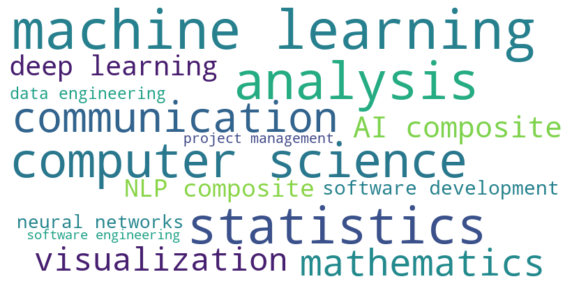

In [27]:
# Word cloud for Data Scientist skills
ds_skills=pd.read_csv("./output/data_scientist_skills.csv")
ds_skills_df = pd.DataFrame(ds_skills)
ds_skills_data = dict(zip(ds_skills_df["Keyword"].tolist(), ds_skills_df["Count"].tolist()))
ds_skills_wc = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(ds_skills_data)
plt.figure(figsize=(10, 10))
plt.imshow(ds_skills_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

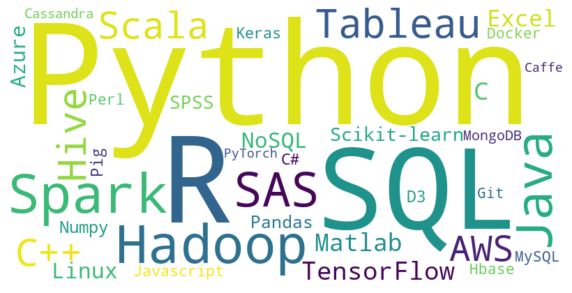

In [28]:
# Word cloud for Softwares/Technology for Data Jobs
ds_software=pd.read_csv("./output/data_scientist_software.csv")
ds_software_df = pd.DataFrame(ds_software)
ds_software_data = dict(zip(ds_software_df["Keyword"].tolist(), ds_software_df["Count"].tolist()))
ds_software_data
ds_software_wc = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(ds_software_data)
plt.figure(figsize=(10, 10))
plt.imshow(ds_software_wc, interpolation='bilinear')
plt.axis('off')
plt.show()